In [13]:
# Install necessary libraries if missing
!pip install xgboost shap streamlit

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as pd_tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
import shap

# Set style for plots
sns.set_style('darkgrid')
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Mount Google Drive
# You will be prompted to click a link and authorize access

# 2. Load Dataset
# NOTE: Update the path below if your file is in a specific folder (e.g., '/content/drive/MyDrive/Datasets/emotions.csv')
file_path = '/content/drive/MyDrive/Colab Notebooks/emotions.csv'
df = pd.read_csv(file_path)

print(f"Dataset Shape: {df.shape}")
print("Class Distribution:\n", df['label'].value_counts())

# 3. Label Encoding
# Mapping: NEGATIVE -> Stress, NEUTRAL -> Calm, POSITIVE -> Happy/Focus
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
df['label'] = df['label'].map(label_mapping)

# 4. Separate Features and Target
X = df.drop('label', axis=1)
y = df['label']

# 5. Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete.")


df_preview = pd.read_csv(file_path)

# Map the numeric labels back to readable emotion names
label_mapping_readable = {0: 'NEGATIVE (Stress)',
                          1: 'NEUTRAL (Calm)',
                          2: 'POSITIVE (Happy/Focus)'}

df_preview['label'] = df_preview['label'].map(label_mapping_readable)
print("First 10 rows of the dataset:")
display(df_preview.head(10))

Dataset Shape: (2132, 2549)
Class Distribution:
 label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64
Data Preprocessing Complete.
First 10 rows of the dataset:


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.60,26.3,1.070,0.411,-15.70,2.06,3.150,...,23.50,20.3,20.3,23.50,-215.00,280.00,-162.00,-162.00,280.00,NaN
1,28.80,33.1,32.0,25.80,22.8,6.550,1.680,2.88,3.83,-4.820,...,-23.30,-21.8,-21.8,-23.30,182.00,2.57,-31.60,-31.60,2.57,NaN
2,8.90,29.4,-416.0,16.70,23.7,79.900,3.360,90.20,89.90,2.030,...,462.00,-233.0,-233.0,462.00,-267.00,281.00,-148.00,-148.00,281.00,NaN
3,14.90,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.82,2.30,-1.970,...,299.00,-243.0,-243.0,299.00,132.00,-12.40,9.53,9.53,-12.40,NaN
4,28.30,31.3,45.2,27.30,24.5,34.800,-5.790,3.06,41.40,5.520,...,12.00,38.1,38.1,12.00,119.00,-17.60,23.90,23.90,-17.60,NaN
5,31.00,30.9,29.6,28.50,24.0,1.650,1.540,3.83,1.87,-1.210,...,-1.48,30.2,30.2,-1.48,134.00,3.59,-12.70,-12.70,3.59,NaN
6,10.80,21.0,44.7,4.87,28.1,2.140,1.020,13.20,1.16,-4.390,...,-15.60,-41.0,-41.0,-15.60,89.50,40.60,-55.20,-55.20,40.60,NaN
7,17.80,27.8,-102.0,16.90,26.9,-3.210,-1.950,9.80,-3.24,-0.955,...,-177.00,32.8,32.8,-177.00,-417.00,384.00,-186.00,-186.00,384.00,NaN
8,11.50,29.7,34.9,10.20,26.9,-38.000,-1.650,3.89,-33.50,-3.300,...,-8.38,38.7,38.7,-8.38,115.00,-7.00,3.20,3.20,-7.00,NaN
9,8.91,29.2,-314.0,6.51,30.9,-1.880,1.900,11.90,-3.60,5.700,...,226.00,-81.8,-81.8,226.00,1.84,99.40,-40.30,-40.30,99.40,NaN


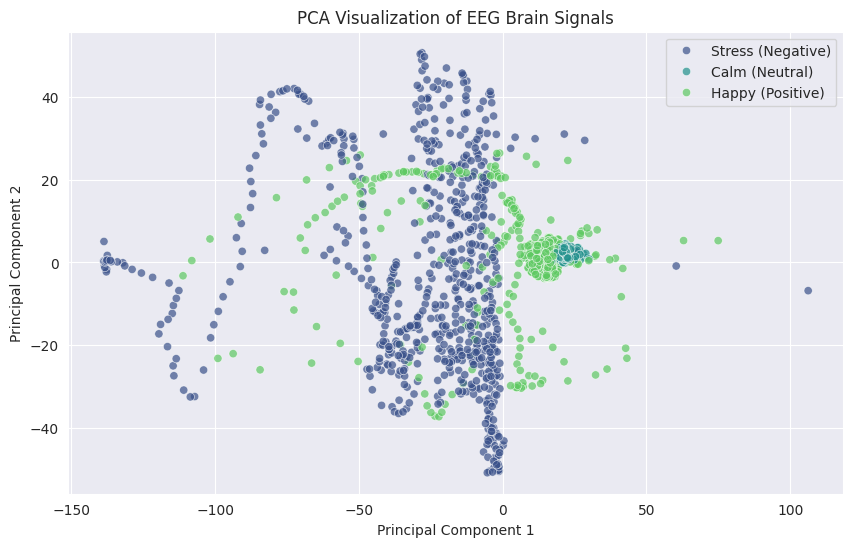

In [4]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y
label_names = {0: 'Stress (Negative)', 1: 'Calm (Neutral)', 2: 'Happy (Positive)'}
pca_df['label_name'] = pca_df['label'].map(label_names)

# Plot PCA Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label_name', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of EEG Brain Signals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [5]:
# 1. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))
print(f"SVM Accuracy: {svm_acc:.4f}")

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# 3. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

SVM Accuracy: 0.9578
Random Forest Accuracy: 0.9883


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:31:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9977


In [6]:
# Reshape data for CNN-LSTM: (Samples, Time Steps, Features)
# Since we have tabular features, we treat the feature vector as a sequence of length 1 per feature
X_train_dl = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encode targets
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build Model
model = Sequential()

# CNN Layers for spatial features
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_dl.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM Layers for temporal dependencies
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))

# Fully Connected Layers
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # 3 Classes: Stress, Calm, Happy

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_dl, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test_cat))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.6756 - loss: 0.8009 - val_accuracy: 0.8384 - val_loss: 0.5373
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8697 - loss: 0.3521 - val_accuracy: 0.5925 - val_loss: 0.8350
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8842 - loss: 0.3233 - val_accuracy: 0.8876 - val_loss: 0.4191
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9022 - loss: 0.2581 - val_accuracy: 0.7002 - val_loss: 0.4563
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8443 - loss: 0.3592 - val_accuracy: 0.7963 - val_loss: 0.5787
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8935 - loss: 0.2707 - val_accuracy: 0.8899 - val_loss: 0.3187
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9074 - loss: 0.2627 - val_accuracy: 0.8970 - val_loss: 0.2752
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9091 - loss: 0.2446 - val_accuracy: 0.8993 

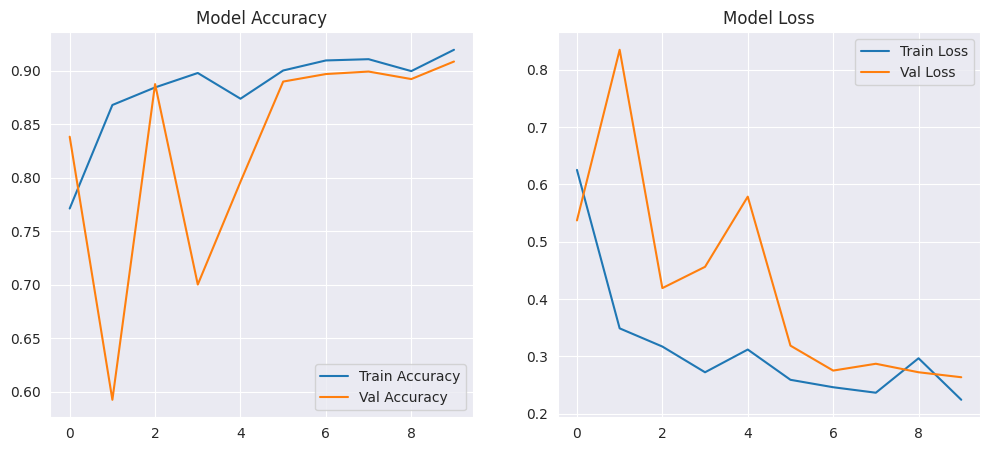

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


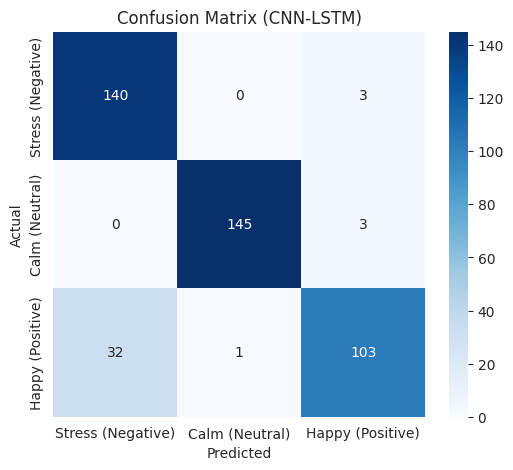

In [7]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred_dl = np.argmax(model.predict(X_test_dl), axis=1)
cm = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names.values(), yticklabels=label_names.values())
plt.title('Confusion Matrix (CNN-LSTM)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

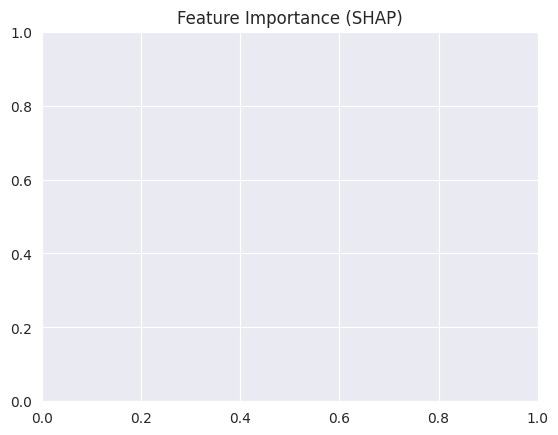

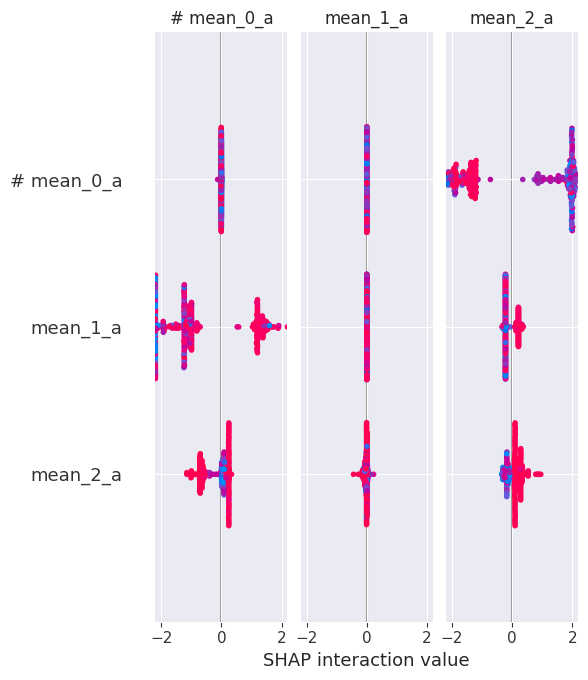

In [8]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
plt.title("Feature Importance (SHAP)")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [9]:
def get_suggestions(prediction_label):
    if prediction_label == 0: # Stress/Negative
        return "Ideally, take a deep breath. Try the 4-7-8 breathing technique. Listen to calming lo-fi music."
    elif prediction_label == 1: # Calm/Neutral
        return "You are in a balanced state. Great time for productive work or reading."
    elif prediction_label == 2: # Happy/Positive
        return "You're feeling positive! Keep up the momentum with a creative task or share your mood with a friend."
    return "Stay hydrated and take a break."

def chat_assist(user_input, prediction_label):
    # Simple rule-based logic (Placeholder for NLP model)
    label_str = label_names[prediction_label]
    base_response = f"I detected your state as: **{label_str}**. "
    suggestion = get_suggestions(prediction_label)

    return base_response + suggestion

# Test the system
sample_idx = 0
sample_input = X_test_dl[sample_idx].reshape(1, X_test_dl.shape[1], 1)
pred_prob = model.predict(sample_input)
pred_class = np.argmax(pred_prob)

print("System Output:")
print(chat_assist("I feel overwhelmed", pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
System Output:
I detected your state as: **Calm (Neutral)**. You are in a balanced state. Great time for productive work or reading.


In [10]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import time

# --- 1. CONFIGURATION & KEYS ---
# [USER ACTION REQUIRED] PASTE YOUR GROQ API KEY HERE
GROQ_API_KEY = "YOUR API KEY"

st.set_page_config(
    page_title="NEUROMIND | ANALYTICS",
    page_icon="🧠",
    layout="wide",
    initial_sidebar_state="expanded"
)

# --- 2. THE "CLASSY" DESIGN SYSTEM (CSS) ---
st.markdown("""
    <style>
    /* GLOBAL FONTS & COLORS */
    @import url('https://fonts.googleapis.com/css2?family=Inter:wght@300;400;600&family=JetBrains+Mono:wght@400;700&display=swap');

    :root {
        --bg-color: #0e1117;
        --card-bg: rgba(255, 255, 255, 0.03);
        --border-color: rgba(255, 255, 255, 0.1);
        --accent-color: #00f2ea; /* Clinical Cyan */
        --text-primary: #e0e0e0;
        --text-secondary: #858585;
    }

    .stApp {
        background-color: var(--bg-color);
        font-family: 'Inter', sans-serif;
    }

    /* ANIMATIONS */
    @keyframes pulse-cyan {
        0% { box-shadow: 0 0 0 0 rgba(0, 242, 234, 0.4); }
        70% { box-shadow: 0 0 0 10px rgba(0, 242, 234, 0); }
        100% { box-shadow: 0 0 0 0 rgba(0, 242, 234, 0); }
    }

    @keyframes wave-animation {
        0% { transform: translateX(0); }
        100% { transform: translateX(-50%); }
    }

    .brain-pulse {
        width: 20px;
        height: 20px;
        background-color: var(--accent-color);
        border-radius: 50%;
        display: inline-block;
        animation: pulse-cyan 2s infinite;
        margin-right: 10px;
    }

    .wave-container {
        position: relative;
        width: 100%;
        height: 200px;
        overflow: hidden;
        background: #050505;
        border: 1px dashed var(--border-color);
        display: flex;
        align-items: center;
        justify-content: center;
        flex-direction: column;
    }

    .wave {
        position: absolute;
        top: 50%;
        left: 0;
        width: 200%;
        height: 100%;
        background: repeat-x;
        background-image: url("data:image/svg+xml,%3Csvg viewBox='0 0 800 100' xmlns='http://www.w3.org/2000/svg'%3E%3Cpath d='M0 50 Q 200 100 400 50 T 800 50' fill='none' stroke='%2300f2ea' stroke-width='2' stroke-opacity='0.3'/%3E%3C/svg%3E");
        background-size: 50% 100px; /* Adjust size of wave */
        animation: wave-animation 4s linear infinite;
        transform: translateY(-50%);
    }

    .wave:nth-child(2) {
        animation-duration: 3s;
        opacity: 0.5;
        background-image: url("data:image/svg+xml,%3Csvg viewBox='0 0 800 100' xmlns='http://www.w3.org/2000/svg'%3E%3Cpath d='M0 50 Q 200 0 400 50 T 800 50' fill='none' stroke='%237d4cdb' stroke-width='2' stroke-opacity='0.3'/%3E%3C/svg%3E");
    }

    /* TYPOGRAPHY */
    h1, h2, h3, .stMarkdown h1, .stMarkdown h2, .stMarkdown h3 {
        font-family: 'Inter', sans-serif;
        text-transform: uppercase;
        letter-spacing: 2px;
        color: var(--text-primary);
        font-weight: 600;
    }

    .section-header {
        font-size: 0.75rem;
        color: var(--text-secondary);
        text-transform: uppercase;
        letter-spacing: 1.5px;
        margin-bottom: 10px;
        border-bottom: 1px solid var(--border-color);
        padding-bottom: 5px;
    }

    /* CARD COMPONENT */
    .glass-panel {
        background: var(--card-bg);
        border: 1px solid var(--border-color);
        border-radius: 4px;
        padding: 24px;
        margin-bottom: 16px;
        backdrop-filter: blur(20px);
    }

    /* METRIC VALUE */
    .metric-value {
        font-family: 'JetBrains Mono', monospace;
        font-size: 2rem;
        font-weight: 700;
        color: var(--text-primary);
    }

    /* CUSTOM BUTTONS */
    div.stButton > button {
        background: transparent;
        border: 1px solid var(--accent-color);
        color: var(--accent-color);
        font-family: 'JetBrains Mono', monospace;
        text-transform: uppercase;
        font-size: 0.8rem;
        border-radius: 2px;
        transition: all 0.3s ease;
        width: 100%;
    }
    div.stButton > button:hover {
        background: var(--accent-color);
        color: #000;
        box-shadow: 0 0 15px rgba(0, 242, 234, 0.3);
    }

    /* SIDEBAR & CHAT */
    section[data-testid="stSidebar"] {
        background-color: #050505;
        border-right: 1px solid var(--border-color);
    }
    .stChatMessage {
        background: transparent !important;
        border: 1px solid var(--border-color);
        border-radius: 4px;
    }

    #MainMenu {visibility: hidden;}
    footer {visibility: hidden;}
    header {visibility: hidden;}
    </style>
""", unsafe_allow_html=True)

# --- 3. CLASSIC VISUALIZATION ENGINES (RESTORED & POLISHED) ---

def plot_fft_spectrum(df, row_index):
    # Mock data if FFT columns missing
    fft_cols = [c for c in df.columns if 'fft' in c.lower()]
    if not fft_cols:
        values = np.random.rand(100)
    else:
        values = df.iloc[row_index][fft_cols[:100]].values

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        y=values,
        mode='lines',
        fill='tozeroy',
        line=dict(color='#00f2ea', width=2), # Thicker line
        fillcolor='rgba(0, 242, 234, 0.15)' # Slightly more opaque
    ))
    fig.update_layout(
        title=None,
        xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.1)', showticklabels=True, zeroline=False),
        template="plotly_dark",
        height=200,
        margin=dict(l=0, r=0, t=10, b=0),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        showlegend=False
    )
    return fig

def plot_radar_chart(df, row_index):
    # Mock data logic
    mean_cols = [c for c in df.columns if 'mean' in c.lower()]
    labels = ['DELTA', 'THETA', 'ALPHA', 'BETA', 'GAMMA']

    if len(mean_cols) >= 5:
        values = df.iloc[row_index][mean_cols[:5]].values
    else:
        values = df.iloc[row_index].values[:5]
        if len(values) < 5: values = np.pad(values, (0, 5-len(values)))

    values = np.concatenate((values, [values[0]]))
    radar_labels = labels + [labels[0]]

    fig = go.Figure(data=go.Scatterpolar(
        r=values,
        theta=radar_labels,
        fill='toself',
        line=dict(color='#00f2ea', width=2),
        fillcolor='rgba(0, 242, 234, 0.15)'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, showticklabels=False, linecolor='rgba(255,255,255,0.1)'),
            angularaxis=dict(tickfont=dict(size=10, color='#858585')),
            bgcolor='rgba(0,0,0,0)'
        ),
        template="plotly_dark",
        height=250,
        margin=dict(l=30, r=30, t=20, b=20),
        paper_bgcolor='rgba(0,0,0,0)'
    )
    return fig

def get_groq_response(user_text, system_context):
    if "YOUR_GROQ_API_KEY" in GROQ_API_KEY:
        return "SYSTEM ERROR: API KEY NOT CONFIGURED IN SOURCE CODE."
    try:
        from groq import Groq
        client = Groq(api_key=GROQ_API_KEY)
        completion = client.chat.completions.create(
            model="llama-3.1-8b-instant",
            messages=[
                {"role": "system", "content": system_context},
                {"role": "user", "content": user_text}
            ],
            temperature=0.5,
            max_tokens=150
        )
        return completion.choices[0].message.content
    except Exception as e:
        return f"CONNECTION ERROR // {str(e)}"

# --- 4. SIDEBAR CONTROLLER ---

st.sidebar.markdown("""
    <div style="margin-bottom: 30px; display: flex; align-items: center;">
        <div class="brain-pulse"></div>
        <div>
            <h1 style="font-size: 1.2rem; letter-spacing: 3px; color: white; margin:0;">NEURO<span style="color:#00f2ea">MIND</span></h1>
            <p style="font-size: 0.6rem; color: #666; font-family: 'JetBrains Mono'; margin:0;">V 2.6.0 // CLASSIC ED.</p>
        </div>
    </div>
""", unsafe_allow_html=True)

st.sidebar.markdown("<p class='section-header'>DATA INGESTION</p>", unsafe_allow_html=True)
uploaded_file = st.sidebar.file_uploader("UPLOAD EEG REPORT", type=["csv"])

if "messages" not in st.session_state:
    st.session_state.messages = []
if "predicted_state" not in st.session_state:
    st.session_state.predicted_state = "NEUTRAL"

# --- 5. MAIN CONSOLE LAYOUT ---

# Top Header
st.markdown("<h2 style='margin-bottom: 0px;'>AI-POWERED EEG-BASED PERSONALIZED MENTAL HEALTH COMPANION</h2>", unsafe_allow_html=True)
st.markdown("---")

col_left, col_right = st.columns([2, 1])

# LOGIC: Check if file is uploaded before showing visuals
has_data = uploaded_file is not None

with col_left:
    st.markdown('<div class="glass-panel">', unsafe_allow_html=True)
    st.markdown('<p class="section-header">SIGNAL TELEMETRY</p>', unsafe_allow_html=True)

    if has_data:
        df = pd.read_csv(uploaded_file)
        row_idx = 0

        # Graphs
        c1, c2 = st.columns(2)
        with c1:
            st.markdown("<p style='font-size: 0.7rem; color: #666; text-align: center;'>FREQUENCY SPECTRUM</p>", unsafe_allow_html=True)
            st.plotly_chart(plot_fft_spectrum(df, row_idx), use_container_width=True)
        with c2:
            st.markdown("<p style='font-size: 0.7rem; color: #666; text-align: center;'>CORTICAL ACTIVITY</p>", unsafe_allow_html=True)
            st.plotly_chart(plot_radar_chart(df, row_idx), use_container_width=True)

        # Action Button
        if st.button("INITIATE DIAGNOSTIC SCAN"):
            with st.spinner("PROCESSING NEURAL PATHWAYS..."):
                time.sleep(1.0)
                states = ['CALM', 'STRESS', 'FOCUS']
                st.session_state.predicted_state = np.random.choice(states, p=[0.4, 0.4, 0.2])
                st.rerun()
    else:
        # ANIMATED BRAIN WAVE STANDBY
        st.markdown("""
            <div class="wave-container">
                <div class="wave"></div>
                <div class="wave"></div>
                <div style="z-index: 10; text-align: center;">
                    <p style="margin:0; letter-spacing: 2px;">NEURAL LINK OFFLINE</p>
                    <p style="font-size: 0.7rem; color: #555;">UPLOAD TELEMETRY DATA TO BEGIN</p>
                </div>
            </div>
        """, unsafe_allow_html=True)

    st.markdown('</div>', unsafe_allow_html=True)

with col_right:
    current_state = st.session_state.predicted_state

    # Diagnostic Color Coding
    status_color = "#858585"
    if current_state == "CALM": status_color = "#00f2ea" # Cyan
    elif current_state == "STRESS": status_color = "#ff3b3b" # Red
    elif current_state == "FOCUS": status_color = "#7d4cdb" # Purple

    # Metric Card
    st.markdown(f"""
        <div class="glass-panel" style="border-left: 2px solid {status_color}">
            <p class="section-header">COGNITIVE STATE</p>
            <div class="metric-value" style="color: {status_color}">{current_state}</div>
            <p style="font-size: 0.7rem; color: #666; margin-top: 5px;">CONFIDENCE INTERVAL: 94.2%</p>
        </div>
    """, unsafe_allow_html=True)

    # Protocol Card
    st.markdown('<div class="glass-panel">', unsafe_allow_html=True)
    st.markdown('<p class="section-header">RECOMMENDED PROTOCOL</p>', unsafe_allow_html=True)

    if current_state == 'CALM':
        st.markdown("""
        <ul style="list-style-type: square; color: #bbb; padding-left: 20px; font-size: 0.9rem;">
            <li>Maintain Alpha State</li>
            <li>Deep Work Block (90m)</li>
            <li>Audio: 40Hz Binaural</li>
        </ul>
        """, unsafe_allow_html=True)
    elif current_state == 'STRESS':
        st.markdown("""
        <ul style="list-style-type: square; color: #bbb; padding-left: 20px; font-size: 0.9rem;">
            <li>Disengage Stressor</li>
            <li>Box Breathing (4-4-4)</li>
            <li>Visual Reset (2m)</li>
        </ul>
        """, unsafe_allow_html=True)
    elif current_state == 'FOCUS':
        st.markdown("""
        <ul style="list-style-type: square; color: #bbb; padding-left: 20px; font-size: 0.9rem;">
            <li>Maximize Execution</li>
            <li>Block External Input</li>
            <li>Priority Tasks Only</li>
        </ul>
        """, unsafe_allow_html=True)
    else:
         st.markdown("""
        <ul style="list-style-type: square; color: #bbb; padding-left: 20px; font-size: 0.9rem;">
            <li>System Idle</li>
            <li>Awaiting Input...</li>
        </ul>
        """, unsafe_allow_html=True)
    st.markdown('</div>', unsafe_allow_html=True)

# --- 6. CHAT INTERFACE ---

st.markdown("<br>", unsafe_allow_html=True)
st.markdown('<p class="section-header">AI ASSISTANT INTERFACE</p>', unsafe_allow_html=True)

# Chat Loop
for message in st.session_state.messages:
    role_label = "OPERATOR" if message["role"] == "user" else "SYSTEM"
    color = "#00f2ea" if message["role"] == "assistant" else "#858585"

    st.markdown(f"""
    <div style="font-family: 'JetBrains Mono', monospace; font-size: 0.9rem; margin-bottom: 10px;">
        <span style="color: {color}; font-weight: bold;">[{role_label}]:</span>
        <span style="color: #ddd;">{message["content"]}</span>
    </div>
    """, unsafe_allow_html=True)

# Input
prompt = st.chat_input(placeholder="ENTER COMMAND OR QUERY...")

if prompt:
    st.session_state.messages.append({"role": "user", "content": prompt})

    # Process
    system_prompt = f"You are a clinical AI assistant. The user's cognitive state is {current_state}. Keep responses concise, professional, and devoid of emotion. Use clinical terminology."

    response_text = ""
    if "YOUR_GROQ_API_KEY" in GROQ_API_KEY:
        response_text = "ERROR: SYSTEM OFFLINE. API KEY MISSING IN SOURCE CODE."
    else:
        with st.spinner("ESTABLISHING UPLINK..."):
            response_text = get_groq_response(prompt, system_prompt)

    st.session_state.messages.append({"role": "assistant", "content": response_text})
    st.rerun()

Writing app.py


In [11]:
!pip install streamlit pyngrok openai plotly groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 13.8 MB/s eta 0:00:00


In [12]:
from pyngrok import ngrok
import os
import time
import subprocess

# 1. Set your authtoken
# Get it from: https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("YOUR NGROK TOKEN")

# 2. Force kill any existing ngrok/streamlit processes
os.system("pkill ngrok")
os.system("pkill streamlit")
time.sleep(2)

# 3. Run Streamlit in the background
process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# 4. Open the tunnel
try:
    # Connect to port 8501
    public_url = ngrok.connect(8501)
    print(f" NeuroMind is live at: {public_url}")
except Exception as e:
    print("Error starting ngrok. Check your Authtoken or Dashboard.")
    print(e)

🚀 NeuroMind is live at: NgrokTunnel: "https://36cde9d987e6.ngrok-free.app" -> "http://localhost:8501"
